In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [45]:
# declare arrays

nbox = [20,40,80,120,160]
nbox = [100]
jack = []
for nb in range(len(nbox)):
    nx = nbox[nb]

    #nx = 100
    nm = 4
    fact = np.zeros(nx)
    x = np.zeros(nx)
    f = np.zeros(nx+2)
    fnew = np.zeros(nx+2)
    fmom = np.zeros(nm+1)
    hmom = np.zeros(nm+1)
    xmom = np.zeros(nm+1)

    chal = np.zeros(nx)
    chbl = np.zeros(nx)

    main = []
    mvar = []
    tt = []
    # baseline parameters
    Nsteps = 10001
    nout = 100
    sizex = 1.0
    dx = sizex/float(nx-1)
    dif = 1.0
    vel = 10.
    cha = 0.0
    chb = 0.0
    # mesh size and CFL numbers
    # pe = vel*sizex/dif
    # da = cha*sizex*sizex/dif

    cfl = 0.1
    dtd = 1.0
    if dif != 0:
        dtd = dx**2/dif
    dta = 1.0
    if vel != 0:
        dta = dx/vel
    dtc = 1.0
    if cha != 0.0:
        dtc = 1.0/cha

    dt = cfl*min(min(dta,dtd),dtc)

    alfa = vel*dt/dx
    delta = dif*dt/(dx*dx)
    alfa = np.sqrt(1.5*delta*2)
#     if alfa > 2*delta:
#         break
#   
    wid = 4
    sigma = wid*dx

    for i in range(nx):
        x[i] = dx*float(i)
        xj = (x[i]-sizex/2)/sigma
        f[i+1] = (1.0/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*xj*xj)
    #plt.plot(x,f[1:-1])
    main.append(np.copy(f))

    a = delta + 0.5*alfa
    b = delta - 0.5*alfa
    c = 1.0-a-b

    for j in range(0,Nsteps):
        f[0] = f[nx]
        f[nx+1] = f[1]
        for k in range(1,nx+1):
            fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
        for k in range(0,nx):
            f[k+1] = fnew[k+1]
        main.append(np.copy(f))
        if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mass = fmom[0]
            mvar.append((mass,fmean,fvar))
            tt.append(dt*j)
    for i in range(nx):
        xj = (x[i]-sizex/2.0)
        fact[i] = (1.0/np.sqrt(4*np.pi*1*(8*dx**2 + 1000*dt)))*np.exp(-xj*xj/(4*(8*dx**2 + 1000*dt)))
    jack.append(np.linalg.norm(fact-f[1:-1]))

    main = np.array(main)



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:92: RuntimeWarning: overflow encountered in double_scalars


In [46]:
alfa**2

0.3000000000000001

(-1.0445097287683437e+61, 1.2855504354071922e+61)

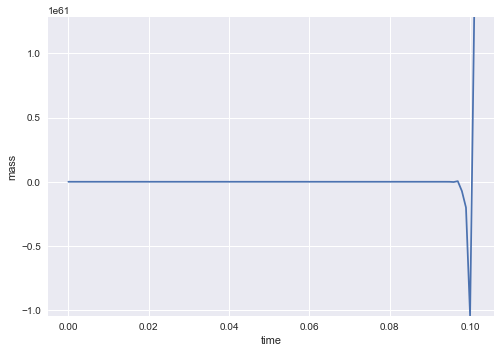

In [47]:
mvar = np.array(mvar)
plt.plot(tt,mvar[:,0])
plt.ylabel('mass')
plt.xlabel('time')
plt.ylim([min(mvar[:,0]),max(mvar[:,0])])
#plt.savefig('massdiff2.jpg')

In [6]:
jack

[9.2497819763666698]

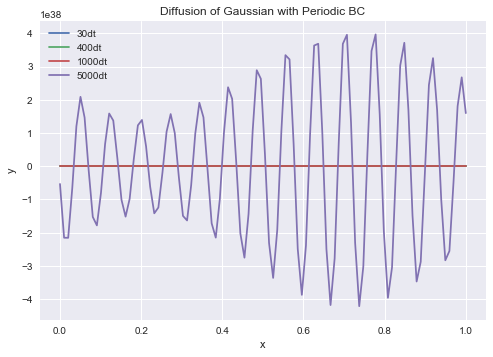

In [48]:
plt.figure()
plt.plot(x,main[30,1:-1],label = '30dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.plot(x,main[1000,1:-1],label = '1000dt')
plt.plot(x,main[5000,1:-1],label = '5000dt')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Diffusion of Gaussian with Periodic BC')
#plt.savefig('diffgauss3.jpg')

In [52]:
len(nbox)


5

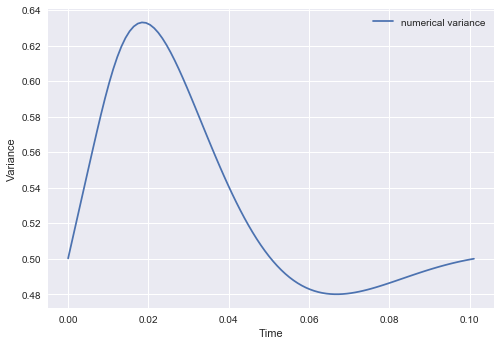

In [29]:
mvar = np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1],label ='numerical variance')
#plt.plot(tt,0.5+sigma**2 + 2*dif*tt,label = 'analytical variance = $\sigma^2 + 2Dt$')
#plt.xlim([])
plt.legend()
#plt.ylim([0,0.25])
plt.xlabel('Time')
plt.ylabel('Variance')
#plt.savefig('numvarad1.jpg')

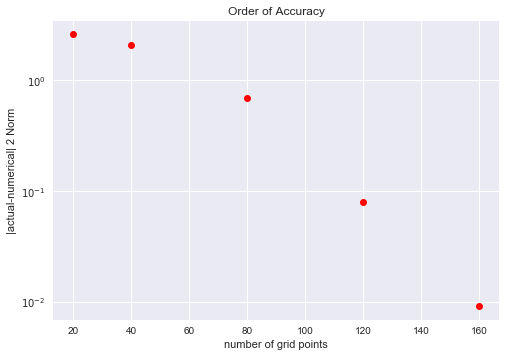

In [60]:
plt.figure()
plt.semilogy(nbox,jack,'ro')
plt.xlabel('number of grid points')
plt.ylabel('|actual-numerical| 2 Norm')
plt.title('Order of Accuracy')
plt.savefig('oaccuracy.jpg')

# ADR1.F

In [38]:
# declare arrays

nx = 100
nm = 4
x = np.zeros(nx)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
chal = np.zeros(nx)
chbl = np.zeros(nx)

main = []
# baseline parameters
Nsteps = 10000
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0.0
vel = 0.0
cha = 1.0
chb = 0.1
# mesh size and CFL numbers
pe = vel*sizex/dif
da = cha*sizex*sizex/dif

cfl = 0.25
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 1
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
#plt.plot(x,f[1:-1])
main.append(np.copy(f))

a = delta + 0.5*alfa
b = delta - 0.5*alfa
c = 1.0-a-b
ramp = 0
rch = 0
for j in range(nx):
    ramp = 2.0*cha
    rch = ramp*(2.0*np.random.randn()-1.0)
    chal[j] = cha + rch
    chbl[j] = chb

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
    for k in range(0,nx):
        chra = chal[k] - chbl[k]*f[k+1]
        fnew[k+1] = np.exp(chra*dt)*fnew[k+1]
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))

main = np.array(main)



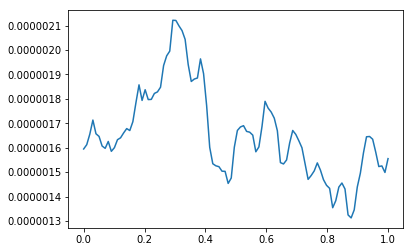

In [43]:
plt.plot(x,main[8000,1:-1])

# question 1

In [12]:
# declare arrays

nx = 100
nm = 4
x = np.zeros(nx)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
main = []
tt = []
# baseline parameters
Nsteps = 10000
nout = 100
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0
cha = 20.0
chb = 1.0
# mesh size and CFL numbers
# pe = vel*sizex/dif
# da = cha*sizex*sizex/dif

cfl = 0.4
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 10
sigma = wid*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
main.append(np.copy(f))

a = delta + 0.5*alfa
b = delta - 0.5*alfa
c = 1.0-a-b
# chal = np.zeros(nx)
# for i in range(nx):
#     chal[i]= cha*np.random.randn()

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] +cha*dt*f[k]-chb*dt*f[k]*f[k]
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

main = np.array(main)



In [18]:
import numpy as np
import matplotlib.pyplot as plt
np.mod(101,100)

1

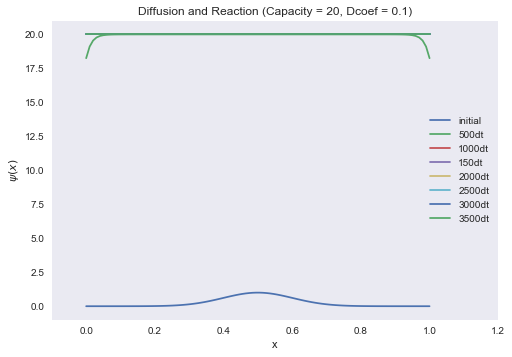

In [19]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[50,1:-1],label = '500dt')
plt.plot(x,main[100,1:-1],label = '1000dt')
plt.plot(x,main[150,1:-1],label = '150dt')
plt.plot(x,main[200,1:-1],label = '2000dt')
plt.plot(x,main[250,1:-1],label = '2500dt')
plt.plot(x,main[300,1:-1],label = '3000dt')
plt.plot(x,main[350,1:-1],label = '3500dt')
# plt.plot(x,main[4000,1:-1],label = '4000dt')
# plt.plot(x,main[9000,1:-1],label = '9000dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('Diffusion and Reaction (Capacity = 20, Dcoef = 0.1)')
plt.grid(False)


In [22]:
plt.plot(tt,mvar)


(10,)

# 2D Diffusion Only

In [4]:
# declare arrays

nx = 100
ny = 100
nm = 4
x = np.zeros(nx)
y = np.zeros(ny)
f = np.zeros((nx+2,nx+2))
fnew = np.zeros((nx+2,nx+2))

main = []
# baseline parameters
Nsteps = 2000
nout = 100
sizex = 1.0
sizey = 1.0
dx = sizex/float(nx-1)
dy = sizey/float(ny-1)

dif = 1
vel = 0

cfl = 0.1
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
# if cha != 0.0:
#     dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 1
sigma = wid*10*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    for j in range(ny):
        y[j] = dy*float(j)
        yj = (y[j] - sizey/2)/sigma
        f[i+1,j+1] = (np.exp(-0.5*xj*xj))*(np.exp(-0.5*yj*yj))
#plt.plot(x,f[1:-1])
main.append(np.copy(f))

a = delta - 0.5*alfa
b = delta + 0.5*alfa
c = 1.0-a-b

for j in range(0,Nsteps):
    # BC
    f[0,:] = f[nx,:]
    f[nx+1,:] = f[1,:]
    f[:,0] = f[:,ny]
    f[:,ny+1] = f[:,1]

    for k in range(1,nx+1):
        for l in range(1,nx+1):
            fnew[k,l] = a*f[k-1,l] + c*f[k,l] + b*f[k+1,l] + a*f[k,l-1] + b*f[k,l+1] -2*delta*f[k,l] 
    main.append(np.copy(f))
    for k in range(nx):
        for l in range(nx):
            f[k+1,l+1] = fnew[k+1,l+1]
    
main = np.array(main)



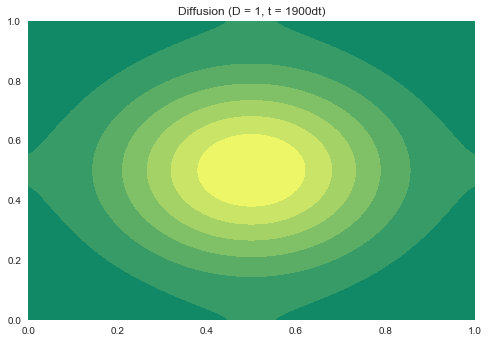

In [37]:
X,Y = np.meshgrid(x,y)
from mpl_toolkits.mplot3d import axes3d
#fig,ax = plt.figure()
#ax = fig.gca(projection='3d')
plt.contourf(X, Y, main[1900,1:-1,1:-1],cmap = 'summer')
plt.title('Diffusion (D = 1, t = 1900dt)')
plt.savefig('diff2d5.jpg')

# Question 2: 2D ADR

In [11]:
# declare arrays

nx = 100
ny = 100
nm = 4
x = np.zeros(nx)
y = np.zeros(ny)
f = np.zeros((nx+2,nx+2))
fnew = np.zeros((nx+2,nx+2))

main = []
# baseline parameters
Nsteps = 2000
nout = 100
sizex = 1.0
sizey = 1.0
dx = sizex/float(nx-1)
dy = sizey/float(ny-1)

dif = 0.01
vel = 2
cha = 20.0
chb = 1.0
# mesh size and CFL numbers
# pe = vel*sizex/dif
# da = cha*sizex*sizex/dif

cfl = 0.1
dtd = 1.0
if dif != 0:
    dtd = dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel
dtc = 1.0
if cha != 0.0:
    dtc = 1.0/cha

dt = cfl*min(min(dta,dtd),dtc)

alfa = vel*dt/dx
delta = dif*dt/(dx*dx)

wid = 1
sigma = wid*10*dx

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    for j in range(ny):
        y[j] = dy*float(j)
        yj = (y[j] - sizey/2)/sigma
        f[i+1,j+1] = (np.exp(-0.5*xj*xj))*(np.exp(-0.5*yj*yj))
#plt.plot(x,f[1:-1])
main.append(np.copy(f))

a = delta - 0.5*alfa
b = delta + 0.5*alfa
c = 1.0-a-b

for j in range(0,Nsteps):
    # BC
    f[0,:] = f[nx,:]
    f[nx+1,:] = f[1,:]
    f[:,0] = f[:,ny]
    f[:,ny+1] = f[:,1]

    for k in range(1,nx+1):
        for l in range(1,nx+1):
            fnew[k,l] = a*f[k-1,l] + c*f[k,l] + b*f[k+1,l] + a*f[k,l-1] + b*f[k,l+1] -2*delta*f[k,l] +cha*dt*f[k,l]-chb*dt*f[k,l]*f[k,l]
    main.append(np.copy(f))
    for k in range(nx):
        for l in range(nx):
            f[k+1,l+1] = fnew[k+1,l+1]
    
main = np.array(main)



In [12]:
main = np.array(main)

In [13]:
X,Y = np.meshgrid(x,y)

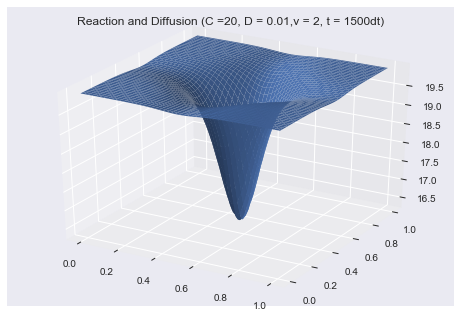

In [16]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, main[1500,1:-1,1:-1])
plt.title('Reaction and Diffusion (C =20, D = 0.01,v = 2, t = 1500dt)')
plt.savefig('adr3.jpg')

# Question 3

In [20]:
x =1
xnew = 5
Nsteps = 200
dt = 0.1

time = 0
while time < 0.3:
    error = abs(x+dt*x**2 - x)
    while error > 10**(-3):
        dt = dt/2
        error = abs(x+dt*x**2-x)
    x = x+dt*x**2
    time = time + dt
    dt = 0.1

In [21]:
time

0.30039062499999875

In [22]:
x

1.428985728563621

# Question 4

In [2]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []
main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1


cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)

dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:105: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:106: RuntimeWarning: invalid value encountered in double_scalars


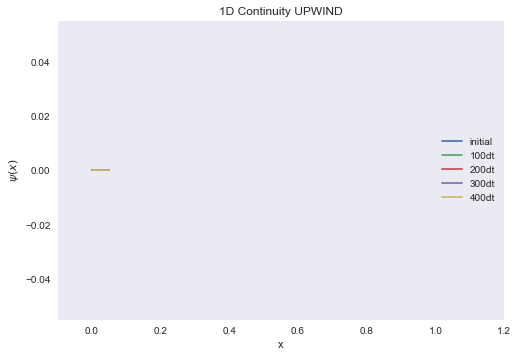

In [3]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('1dcts.jpg')

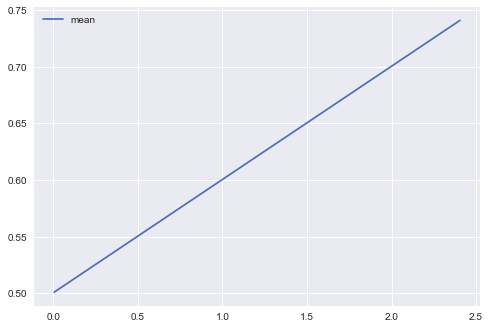

In [17]:
mvar = np.array(mvar)
tt = np.array(tt)
plt.figure()
plt.plot(tt,mvar[:,0],label = 'mean')
#plt.plot(tt,mvar[:,1],label = 'var')
plt.legend()
plt.savefig('m1.jpg')

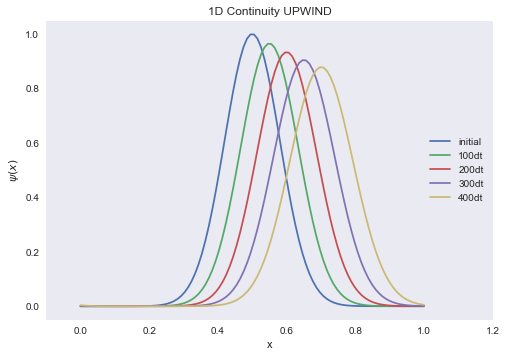

In [23]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


mvar = []
tt = []

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

# for i in range(nx):
#     x[i] = dx*float(i)
#     f[i+1] = 0
#     if (x[i]>xm) and (x[i]<xp):
#         f[i+1] = 1.0
#     xj = (x[i]-sizex/2)/(sizex/2)
#     u[i+1] = vel
#     if (nuni > 0 ):
#         u[i+1] = vel*(1-xj*xj)
for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
    u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('gupwind.jpg')


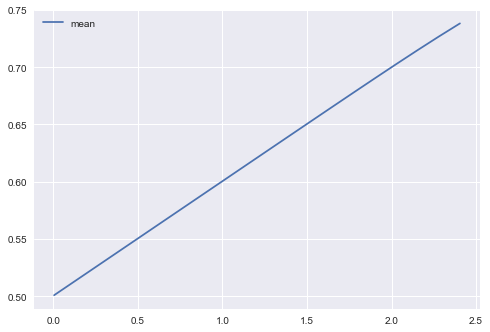

In [20]:
mvar = np.array(mvar)
tt = np.array(tt)
plt.figure()
plt.plot(tt,mvar[:,0],label = 'mean')
#plt.plot(tt,mvar[:,1],label = 'var')
plt.legend()
plt.savefig('m2.jpg')

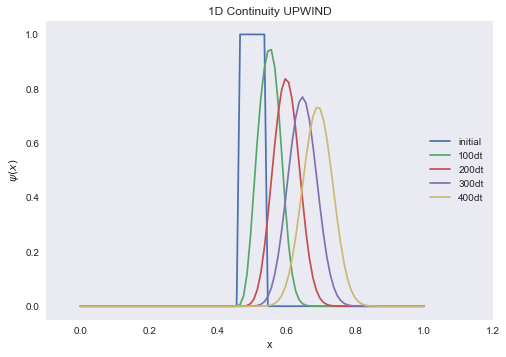

In [21]:
# declare arrays

nuni = 1
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)



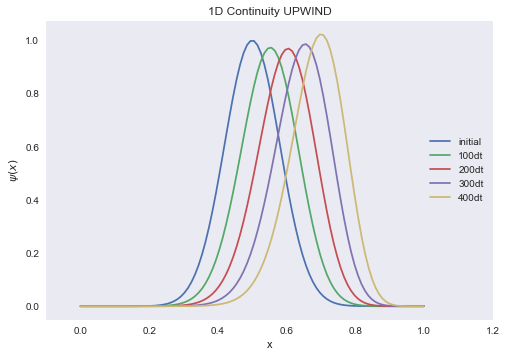

In [24]:
# declare arrays

nuni = 1
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    xj = (x[i]-sizex/2)/sigma
    f[i+1] = np.exp(-0.5*xj*xj)
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal + delta
                b = delta
                c = 1. - alfac - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    main.append(np.copy(f))
    
main = np.array(main)

plt.figure()
plt.plot(x,main[0,1:-1],label = 'initial')
plt.plot(x,main[100,1:-1],label = '100dt')
plt.plot(x,main[200,1:-1],label = '200dt')
plt.plot(x,main[300,1:-1],label = '300dt')
plt.plot(x,main[400,1:-1],label = '400dt')
plt.xlabel('x')
plt.ylabel('$ \psi(x) $')
plt.xlim([-0.1,1.2])
plt.legend( loc="center right")
plt.title('1D Continuity UPWIND')
plt.grid(False)
plt.savefig('gparabolic.jpg')


# Lax Wendroff

In [6]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            if (u[k]>0):
                a = alfal/2 *(1+alfal) + delta
                b = delta + alfal/2*(-1+alfal)
                c = 1. - alfac**2 - 2.*delta
            else:
                a = delta
                b = delta - alfar
                c = 1. + alfac -2*delta
        fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



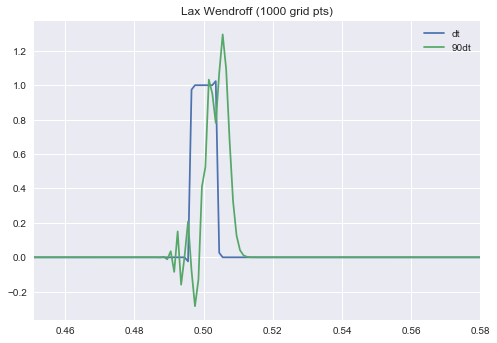

In [44]:
plt.figure()
plt.plot(x,main[1,1:-1],label = 'dt')
plt.plot(x,main[90,1:-1],label = '90dt')
plt.title('Lax Wendroff (1000 grid pts)')
plt.legend()
plt.xlim([0.451,0.58])
plt.savefig('lw2.jpg')

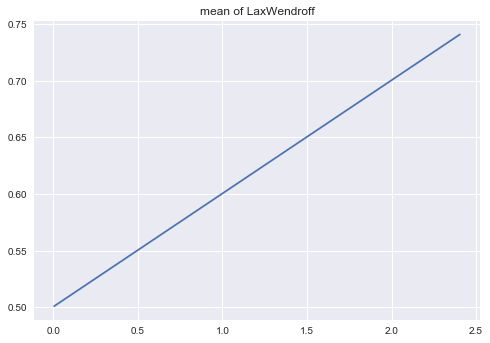

In [33]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of LaxWendroff')
plt.savefig('lwendmean.jpg')

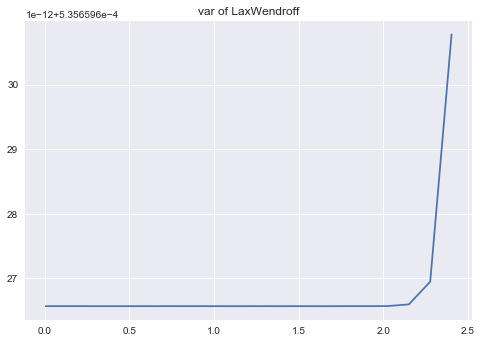

In [34]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of LaxWendroff')
plt.savefig('lwendvar.jpg')

# Lax Friedrichs

In [2]:
# declare arrays

nuni = 0
ifd = 2

nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)

fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []


main = []
# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0
vel = 0.1

cfl = 0.05
dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
# for i in range(nx):
#     x[i] = dx*float(i)
#     xj = (x[i]-sizex/2)/sigma
#     f[i+1] = np.exp(-0.5*xj*xj)
#     u[i+1] = vel
    
main.append(np.copy(f))
epsilon = 0.02
u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    time = dt*j
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfal = u[k-1]*dt/dx
        alfac = u[k]*dt/dx
        alfar = u[k+1]*dt/dx
        if (ifd == 2):
            fnew[k] = f[k] + epsilon/2 *(f[k-1] - 2*f[k] + f[k+1]) - (dt/(2*dx))*(u[k+1]*f[k+1]-u[k-1]*f[k-1]) 
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



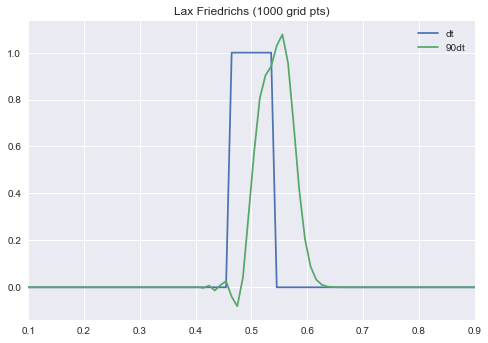

In [3]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'dt')
plt.plot(x,main[90,1:-1],label = '90dt')
plt.title('Lax Friedrichs (1000 grid pts)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf1.jpg')

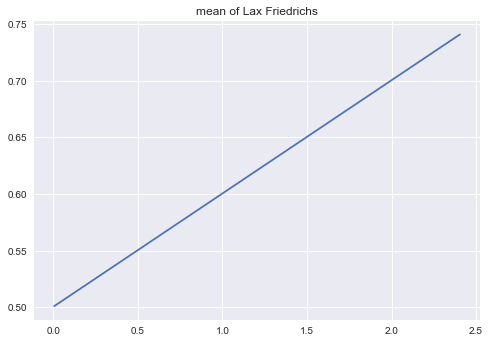

In [4]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of Lax Friedrichs')
plt.savefig('lfmean.jpg')

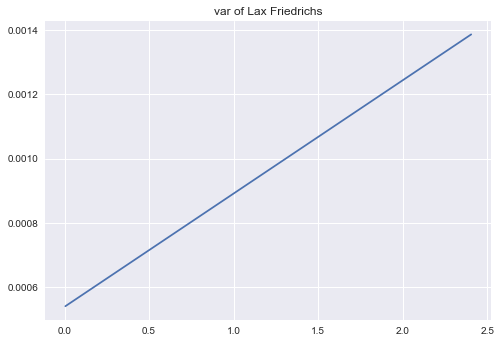

In [5]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of Lax Friedrichs')
plt.savefig('lfvar.jpg')

# Interpolation

In [3]:
# declare arrays

nuni = 0
ifd = 2
nx = 100
nm = 4
x = np.zeros(nx)
u = np.zeros(nx+2)
f = np.zeros(nx+2)
fnew = np.zeros(nx+2)
fmom = np.zeros(nm+1)
hmom = np.zeros(nm+1)
xmom = np.zeros(nm+1)
mvar = []
tt = []
main = []

# baseline parameters
Nsteps = 500
nout = 25
sizex = 1.0
dx = sizex/float(nx-1)
dif = 0

# Constant velocity
vel = 0.1
cfl = 0.05


dtd = 1.0
if dif != 0:
    dtd = 0.5*dx**2/dif
dta = 1.0
if vel != 0:
    dta = dx/vel

dt = cfl*min(dta,dtd)
dnum = dx*dx/dt
delta = dif/dnum

# Initial conditions
wid = 8.0
sigma = wid*dx
xm = 0.5*(sizex - sigma)
xp = 0.5*(sizex + sigma)

for i in range(nx):
    x[i] = dx*float(i)
    f[i+1] = 0
    if (x[i]>xm) and (x[i]<xp):
        f[i+1] = 1.0
    xj = (x[i]-sizex/2)/(sizex/2)
    u[i+1] = vel
    if (nuni > 0 ):
        u[i+1] = vel*(1-xj*xj)
    
main.append(np.copy(f))

u[0] = u[nx]
u[nx+1] = u[1]

for j in range(0,Nsteps):
    f[0] = f[nx]
    f[nx+1] = f[1]
    for k in range(1,nx+1):
        alfa = dt/dx
        A = (0.5+u[k]*alfa)/(1-(alfa*u[k-1] - alfa*u[k]))
        B = (0.5 - u[k]*alfa)/(1 + (alfa*u[k+1] - alfa*u[k]))
        if (ifd == 2):
            fnew[k] = 0.5*A**2*(f[k-1] - f[k]) + 0.5*B**2*(f[k+1] - f[k]) + (A+B)*f[k] 
        
    for k in range(nx):
        f[k+1] = fnew[k+1]
    if(np.mod(j,nout) ==1 ):
            for k in range(nm+1):
                fmom[k] = 0.0
                hmom[k] = 0.0
                xmom[k] = 0.0
            for k in range(nx):
                fj = f[k+1]
                fmom[0] = fmom[0] + fj*dx
                fmom[1] = fmom[1] + fj*x[k]*dx
                fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

                hmom[2] = hmom[2] - fj*fj*dx
                hmom[3] = hmom[3] - (fj**3)*dx
                hmom[4] = hmom[4] - (fj**4)*dx
                if (x[k] > 0.9*sizex):
                    xmom[1] = xmom[1]+fj*x[k]
                    xmom[2] = xmom[2]+fj*x[k]**2
                    xmom[3] = xmom[3]+fj*x[k]**3
            fmean = fmom[1]/fmom[0]
            fvar = fmom[2]/fmom[0] - fmean*fmean
            mvar.append((fmean,fvar))
            tt.append(dt*j)

    main.append(np.copy(f))
    
main = np.array(main)



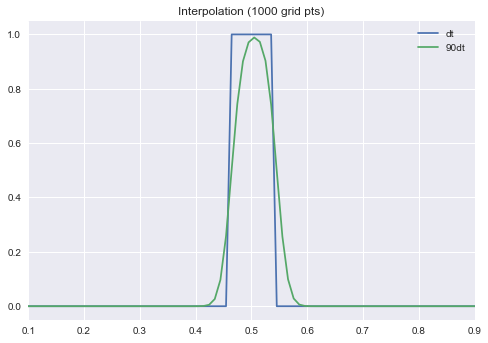

In [6]:
plt.figure()
plt.plot(x,main[0,1:-1],label = 'dt')
plt.plot(x,main[10,1:-1],label = '90dt')
plt.title('Interpolation (1000 grid pts)')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf1.jpg')

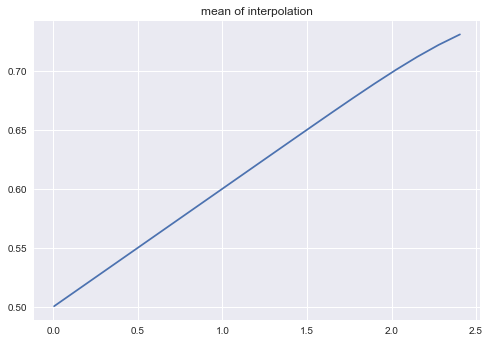

In [8]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,0])
plt.title('mean of interpolation')
plt.savefig('lfmean.jpg')

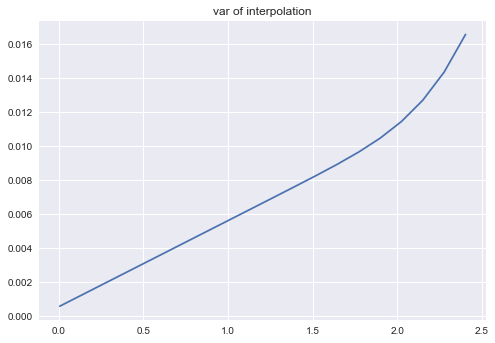

In [9]:
mvar= np.array(mvar)
tt = np.array(tt)
plt.plot(tt,mvar[:,1])
plt.title('var of interpolation')
plt.savefig('lfmean.jpg')

In [3]:
# declare arrays

nuni = 0

methods = []
for ifd in range(4):
    print(ifd)
    nx = 100
    nm = 4
    x = np.zeros(nx)
    u = np.zeros(nx+2)
    f = np.zeros(nx+2)
    fnew = np.zeros(nx+2)

    fmom = np.zeros(nm+1)
    hmom = np.zeros(nm+1)
    xmom = np.zeros(nm+1)
    mvar = []
    tt = []
    main = []
    # baseline parameters
    Nsteps = 500
    nout = 25
    sizex = 1.0
    dx = sizex/float(nx-1)
    dif = 0
    vel = 0.1
    cfl = 0.05
    dtd = 1.0
    if dif != 0:
        dtd = 0.5*dx**2/dif
    dta = 1.0
    if vel != 0:
        dta = dx/vel

    dt = cfl*min(dta,dtd)
#     dx = vel*dt
    dnum = dx*dx/dt
    delta = dif/dnum

    # Initial conditions
    wid = 8.0
    sigma = wid*dx
    xm = 0.5*(sizex - sigma)
    xp = 0.5*(sizex + sigma)

    for i in range(nx):
        x[i] = dx*float(i)
        f[i+1] = 0
        if (x[i]>xm) and (x[i]<xp):
            f[i+1] = 1.0
        xj = (x[i]-sizex/2)/(sizex/2)
        u[i+1] = vel
        if (nuni > 0 ):
            u[i+1] = vel*(1-xj*xj)
    # for i in range(nx):
    #     x[i] = dx*float(i)
    #     xj = (x[i]-sizex/2)/sigma
    #     f[i+1] = np.exp(-0.5*xj*xj)
    #     u[i+1] = vel
    epsilon = 0.02
    main.append(np.copy(f))

    u[0] = u[nx]
    u[nx+1] = u[1]

    for j in range(0,Nsteps):
        time = dt*j
        f[0] = f[nx]
        f[nx+1] = f[1]
        for k in range(1,nx+1):
            alfal = u[k-1]*dt/dx
            alfac = u[k]*dt/dx
            alfar = u[k+1]*dt/dx
             
            
            # interpolation with constant vel
            if(ifd == 3):
                alfa = dt/dx
                A = (0.5+u[k]*alfa)/(1-(alfa*u[k-1] - alfa*u[k]))
                B = (0.5 - u[k]*alfa)/(1 + (alfa*u[k+1] - alfa*u[k]))
                fnew[k] = 0.5*A**2*(f[k-1] - f[k]) + 0.5*B**2*(f[k+1] - f[k]) + (A+B)*f[k] 
                     
            
            # Lax Wendroff
            if (ifd == 2):
                if (u[k]>0):
                    a = alfal/2 *(1+alfal) + delta
                    b = delta + alfal/2*(-1+alfal)
                    c = 1. - alfac**2 - 2.*delta
                else:
                    a = delta
                    b = delta - alfar
                    c = 1. + alfac -2*delta
                fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1]
            
            # Lax Friedrichs
            if (ifd == 1):
                fnew[k] = f[k] + epsilon/2 *(f[k-1] - 2*f[k] + f[k+1]) - (dt/(2*dx))*(u[k+1]*f[k+1]-u[k-1]*f[k-1]) 

            # upwind scheme
            if (ifd == 0):
                if (u[k]>0):
                    a = alfal + delta
                    b = delta
                    c = 1. - alfac - 2.*delta
                else:
                    a = delta
                    b = delta - alfar
                    c = 1. + alfac -2*delta
                fnew[k] = a*f[k-1] + c*f[k] + b*f[k+1] 
        
        for k in range(nx):
            f[k+1] = fnew[k+1]
#         if(np.mod(j,nout) ==1 ):
#                 for k in range(nm+1):
#                     fmom[k] = 0.0
#                     hmom[k] = 0.0
#                     xmom[k] = 0.0
#                 for k in range(nx):
#                     fj = f[k+1]
#                     fmom[0] = fmom[0] + fj*dx
#                     fmom[1] = fmom[1] + fj*x[k]*dx
#                     fmom[2] = fmom[2] + fj*x[k]*x[k]*dx

#                     hmom[2] = hmom[2] - fj*fj*dx
#                     hmom[3] = hmom[3] - (fj**3)*dx
#                     hmom[4] = hmom[4] - (fj**4)*dx
#                     if (x[k] > 0.9*sizex):
#                         xmom[1] = xmom[1]+fj*x[k]
#                         xmom[2] = xmom[2]+fj*x[k]**2
#                         xmom[3] = xmom[3]+fj*x[k]**3
#                 fmean = fmom[1]/fmom[0]
#                 fvar = fmom[2]/fmom[0] - fmean*fmean
#                 mvar.append((fmean,fvar))
#                 tt.append(dt*j)

        main.append(np.copy(f))

    main = np.array(main)
    methods.append(main)


0
1
2
3


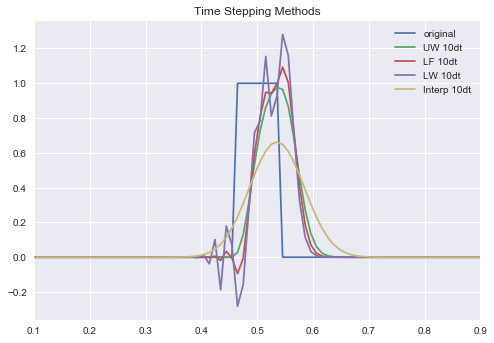

In [4]:
plt.figure()
plt.plot(x,methods[0][0,1:-1],label = 'original')
plt.plot(x,methods[0][70,1:-1],label = 'UW 10dt')
plt.plot(x,methods[1][70,1:-1],label = 'LF 10dt')
plt.plot(x,methods[2][70,1:-1],label = 'LW 10dt')
plt.plot(x,methods[3][70,1:-1],label = 'Interp 10dt')
plt.title('Time Stepping Methods')
plt.xlim([0.1,0.9])
plt.legend()
plt.savefig('lf1.jpg')

In [14]:
np.shape(methods[0])

(501, 102)